<div style="font-family: 'Poppins'; font-weight: bold; letter-spacing: 0px; color: #FFFFFF; font-size: 300%; text-align: left; padding: 15px; background: #0A0F29; border: 8px solid #00FFFF; border-radius: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5);">
    Predicting Insurance Premiums<br>
</div>

# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Introduction</div>

The 2024 Kaggle Playground Series - Season 4, Episode 12 presents a new challenge for data enthusiasts: predicting insurance premiums using a synthetic dataset. This competition offers participants the opportunity to hone their machine learning and feature engineering skills through a practical regression task.

## <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Challenge Overview 📚</div>

- **Goal**: Predict insurance premiums (target variable: Premium Amount) using a set of predictor features.
- **Competition Format**: Participants will work with a synthetically generated dataset modeled after real-world insurance data.
- **Timeline**:
    - Start Date: December 1, 2024
    - Final Submission Deadline: December 31, 2024 (11:59 PM UTC)

## <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Dataset Description 📊 </div>

- **Source**: The dataset is synthetic but based on a deep learning model trained on real-world insurance data.
- **Files**:
    - **train.csv**: Includes training data with features and the continuous target (Premium Amount).
    - **test.csv**: Contains test data where predictions for Premium Amount are required.
    - **sample_submission.csv**: A template submission file in the required format.

- **Key Features**:
    - Variables emulate real-world insurance data distributions but are modified to preserve confidentiality.
    - Incorporating the original dataset may provide insights for better model performance.

## <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Evaluation Metric</div>

Submissions are assessed using **Root Mean Squared Logarithmic Error (RMSLE)**:

$$
\text{RMSLE} = \sqrt{\frac{1}{n} \sum_{i=1}^n \left(\log(1 + \text{pred}_i) - \log(1 + \text{actual}_i)\right)^2}
$$

The goal is to minimize the RMSLE value for predictions.

## <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Submission Guidelines</div>

- Predict the `Premium Amount` for each row in the test set.
- Ensure submissions include a header and follow this format:

| id       | Premium Amount |
|----------|----------------|
| 1200000  | 1102.545       |
| 1200001  | 1102.545       |
| 1200002  | 1102.545       |

# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Automated EDA</div>

In [1]:
# Install general-purpose data science and profiling libraries
!pip install pandas==1.5.3 numba==0.58.1 visions==0.7.5 ydata-profiling==4.7.0 > /dev/null 2>&1

# Install advanced machine learning frameworks
!pip install catboost > /dev/null 2>&1
!pip install ray==2.10.0 autogluon.tabular > /dev/null 2>&1

# Install Optuna and its integrations
!pip install optuna-integration[sklearn] > /dev/null 2>&1

# Install LangChain and OpenAI-specific components
!pip install langchain-core langchain-openai > /dev/null 2>&1

# Install data visualization libraries
!pip install sweetviz > /dev/null 2>&1

In [2]:
# Standard Libraries
import json
import logging
import warnings
from itertools import product
from dataclasses import dataclass
import tempfile

# Data Manipulation and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.colors as mcolors
from IPython.display import Markdown, display, IFrame

# Data Profiling
from ydata_profiling import ProfileReport

# Feature Engineering
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from featuretools import dfs, EntitySet

# Model Selection and Validation
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    RandomizedSearchCV
)

# Metrics and Scoring
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    make_scorer
)

# Scikit-Learn Classifiers
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    VotingClassifier
)

# External Libraries Classifiers
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, log_evaluation

# Optuna for Hyperparameter Tuning
import optuna
from optuna.integration import OptunaSearchCV

# LangChain for LLM
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI

from autogluon.tabular import TabularPredictor
from autogluon.core.metrics import make_scorer

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
from dataclasses import dataclass
from typing import List, Optional, Tuple, Dict

# Suppress Warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=RuntimeWarning, message="underflow encountered*")

In [3]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
OPENAI_API_KEY = user_secrets.get_secret("openai_key")

In [4]:
# Define the LLM model using LangChain
model = ChatOpenAI(
    model='gpt-4o-2024-05-13',
    temperature=0,
    api_key=OPENAI_API_KEY
)

In [5]:
TIME_LIMIT=3600 * 2

In [6]:
# Function to generate EDA summary
def eda_summary(df):
    summary = {}
    
    # General Info
    summary['general'] = {
        'num_rows': df.shape[0],
        'num_columns': df.shape[1],
        'num_missing_values': df.isnull().sum().sum(),
        'percent_missing_values': df.isnull().mean().mean() * 100
    }
    
    # Column Data Types
    summary['data_types'] = df.dtypes.to_dict()
    
    # Missing Value Summary (per column)
    summary['missing_values'] = (
        df.isnull()
        .sum()
        .to_frame(name='missing_count')
        .assign(percent_missing=lambda x: (x['missing_count'] / df.shape[0]) * 100)
        .to_dict(orient='index')
    )
    
    # Numerical Summary (Mean, Median, Std, Min, Max)
    describe_df = df.describe()
    numerical_columns = ['mean', '50%', 'std', 'min', 'max']
    available_columns = [col for col in numerical_columns if col in describe_df.columns]
    summary['numerical_summary'] = (
        describe_df[available_columns]
        .rename(columns={'50%': 'median'})
        .to_dict(orient='index')
    )
    
    # Unique Counts for Categorical Columns
    summary['categorical_summary'] = (
        df.select_dtypes(include=['object', 'category'])
        .nunique()
        .to_frame(name='unique_counts')
        .to_dict(orient='index')
    )
    
    # Correlations
    try:
        summary['correlations'] = df.corr(numeric_only=True).to_dict()
    except ValueError:
        summary['correlations'] = "Unable to calculate correlations due to data type issues."
    
    # Outlier Count based on IQR
    outlier_summary = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
        outlier_summary[column] = {
            'outlier_count': outliers.shape[0],
            'percent_outliers': (outliers.shape[0] / df.shape[0]) * 100
        }
    summary['outlier_summary'] = outlier_summary

    return summary

In [7]:
# Define DataConfig class
@dataclass
class DataConfig:
    target_column: str
    id_column: str
    train_path: str
    test_path: str
    random_seed: int = 42
    colors: List[str] = None

    def __post_init__(self):
        if self.colors is None:
            self.colors = px.colors.qualitative.Vivid  # Default to a vivid color scheme

# Define EDA class
class EDA:
    def __init__(self, config: DataConfig):
        self.config = config
        self.df_train = None
        self.df_test = None
        self.numerical_columns = []
        self.categorical_columns = []
        self.colors = config.colors

    def load_data(self):
        """Load train and test data."""
        self.df_train = pd.read_csv(self.config.train_path)
        self.df_test = pd.read_csv(self.config.test_path)
        return self.df_train, self.df_test

    def classify_columns(self):
        """Classify columns into numerical and categorical."""
        # Drop the ID and target columns for classification
        df = self.df_train.drop([self.config.id_column, self.config.target_column], axis=1)
        
        # Classify columns and remove duplicates
        self.numerical_columns = list(set(df.select_dtypes(include=['float64', 'int64']).columns.tolist()))
        self.categorical_columns = list(set(df.select_dtypes(include=['object']).columns.tolist()))
        
        # Print the classification report
        print("\n" + "=" * 50)
        print("🔍 COLUMN CLASSIFICATION REPORT")
        print("=" * 50)
        
        # Print numerical columns
        print("\n📊 Numerical Columns:")
        if self.numerical_columns:
            for col in self.numerical_columns:
                print(f"  - {col}")
        else:
            print("  None")
        
        # Print categorical columns
        print("\n📋 Categorical Columns:")
        if self.categorical_columns:
            for col in self.categorical_columns:
                print(f"  - {col}")
        else:
            print("  None")
        
        print("=" * 50)

    def basic_data_analysis(self):
        """Perform and print a basic data analysis report."""
        analysis = {
            'shape': self.df_train.shape,
            'duplicates': self.df_train.duplicated().sum(),
            'missing_values': self.df_train.isnull().sum().to_dict(),
            'dtypes': self.df_train.dtypes.to_dict()
        }
        
        # Determine if the target is continuous or categorical
        target_data = self.df_train[self.config.target_column]
        if pd.api.types.is_numeric_dtype(target_data):
            analysis['target_summary'] = {
                'mean': target_data.mean(),
                'median': target_data.median(),
                'std': target_data.std(),
                'min': target_data.min(),
                'max': target_data.max()
            }
        else:
            analysis['target_distribution'] = target_data.value_counts().to_dict()
        
        # Print the analysis report
        print("\n" + "=" * 50)
        print("📊 BASIC DATA ANALYSIS REPORT")
        print("=" * 50)
        print(f"Rows: {analysis['shape'][0]:,}")
        print(f"Columns: {analysis['shape'][1]}")
        print(f"Duplicates: {analysis['duplicates']:,}")
        print("Missing Values:")
        for col, count in analysis['missing_values'].items():
            if count > 0:
                print(f"  {col}: {count:,}")
        
        # Print target summary
        print("\nTarget Summary:")
        if 'target_summary' in analysis:
            print("  Continuous Target Variable")
            for stat, value in analysis['target_summary'].items():
                print(f"    {stat.capitalize()}: {value:.2f}")
        elif 'target_distribution' in analysis:
            print("  Categorical Target Variable")
            total = sum(analysis['target_distribution'].values())
            for target_class, count in analysis['target_distribution'].items():
                percentage = (count / total) * 100
                print(f"    {target_class}: {count:,} ({percentage:.2f}%)")
        
        print("=" * 50)
        return analysis

    def visualize_missing_values(self):
        """Visualize missing values."""
        missing_values = self.df_train.isnull().mean() * 100
        missing_values = missing_values[missing_values > 0].sort_values()
        fig = go.Figure(go.Bar(
            x=missing_values.values,
            y=missing_values.index,
            orientation='h',
            marker_color=self.colors[0]
        ))
        fig.update_layout(title="Missing Value Percentage", xaxis_title="Percentage", yaxis_title="Feature")
        fig.show(renderer='iframe')

    def plot_numerical_distributions(self, columns: List[str] = None):
        """Plot numerical column distributions with robust error handling."""
        # Use the provided column list or default to all numerical columns
        columns_to_plot = columns if columns else list(set(self.numerical_columns))
        
        for col in columns_to_plot:
            try:
                assert col in self.df_train.columns, f"Column '{col}' is not found in the dataset."
                # Create a new figure for each column
                fig = px.histogram(self.df_train, x=col, marginal="box", color_discrete_sequence=[self.colors[1]])
                fig.update_layout(title=f"Distribution of {col}", xaxis_title=col, yaxis_title="Count")
                fig.show(renderer='iframe')  # Explicit rendering of each figure
            except AssertionError as e:
                print(f"AssertionError: {e}")
            except Exception as e:
                print(f"An error occurred while plotting '{col}': {e}")

    def plot_categorical_distributions(self, columns: List[str] = None, top_n: int = 20):
        """Plot categorical column distributions with robust error handling."""
        # Use the provided column list or default to all categorical columns
        columns_to_plot = columns if columns else list(set(self.categorical_columns))
        
        for col in columns_to_plot:
            try:
                assert col in self.df_train.columns, f"Column '{col}' is not found in the dataset."
                # Create a new figure for each column
                value_counts = self.df_train[col].value_counts().nlargest(top_n)
                fig = px.bar(x=value_counts.index, y=value_counts.values, color_discrete_sequence=[self.colors[2]])
                fig.update_layout(title=f"Distribution of {col} (Top {top_n})", xaxis_title=col, yaxis_title="Count")
                fig.show(renderer='iframe')  # Explicit rendering of each figure
            except AssertionError as e:
                print(f"AssertionError: {e}")
            except Exception as e:
                print(f"An error occurred while plotting '{col}': {e}")

    def plot_treemap(self, categorical_column: str, top_n: int = 20):
        """Plot a treemap for a categorical column using Plotly."""
        
        # Get the top categories
        value_counts = self.df_train[categorical_column].value_counts().nlargest(top_n)
    
        # Create a DataFrame for the treemap
        treemap_data = pd.DataFrame({
            categorical_column: value_counts.index,
            'Count': value_counts.values
        })
    
        # Generate the treemap using Plotly
        fig = px.treemap(
            treemap_data,
            path=[categorical_column],
            values='Count',
            color='Count',
            color_continuous_scale='Viridis',
            title=f"Treemap of {categorical_column} (Top {top_n})"
        )
    
        # Display the treemap
        fig.show(renderer='iframe')

    def plot_sankey(self, categorical_column: str, top_n: int = 20):
        """Create a Sankey diagram for a categorical column and the target variable."""
        top_categories = self.df_train[categorical_column].value_counts().nlargest(top_n).index
        filtered_data = self.df_train[self.df_train[categorical_column].isin(top_categories)]
        sankey_data = filtered_data.groupby([categorical_column, self.config.target_column]).size().reset_index(name='Count')

        all_labels = top_categories.tolist() + [f"{self.config.target_column}: {v}" for v in self.df_train[self.config.target_column].unique()]
        source_indices = []
        target_indices = []
        values = []

        for i, cat in enumerate(top_categories):
            for j, target in enumerate(self.df_train[self.config.target_column].unique()):
                count = sankey_data[(sankey_data[categorical_column] == cat) & (sankey_data[self.config.target_column] == target)]['Count']
                if not count.empty:
                    source_indices.append(i)
                    target_indices.append(len(top_categories) + j)
                    values.append(count.values[0])

        node_colors = self.colors[:len(all_labels)]
        fig = go.Figure(data=[go.Sankey(
            node=dict(pad=10, thickness=20, label=all_labels, color=node_colors),
            link=dict(source=source_indices, target=target_indices, value=values)
        )])
        fig.update_layout(title=f"Sankey Diagram: {categorical_column} vs {self.config.target_column}")
        fig.show(renderer='iframe')

    def correlation_matrix(self):
        """Plot a correlation matrix."""
        corr = self.df_train.corr(numeric_only=True)
        fig = px.imshow(corr, text_auto=True, color_continuous_scale='RdBu')
        fig.update_layout(title="Correlation Matrix")
        fig.show(renderer='iframe')

In [8]:
# Define DataConfig class
@dataclass
class DataConfigSeaborn:
    target_column: str
    id_column: str
    train_path: str
    test_path: str
    random_seed: int = 42
    colors: List[str] = None

    def __post_init__(self):
        if self.colors is None:
            self.colors = sns.color_palette("deep")

# Define EDA class
class EDASeaborn:
    def __init__(self, config: DataConfigSeaborn):
        self.config = config
        self.df_train = None
        self.df_test = None
        self.numerical_columns = []
        self.categorical_columns = []
        self.colors = config.colors

    def load_data(self):
        """Load train and test data."""
        self.df_train = pd.read_csv(self.config.train_path)
        self.df_test = pd.read_csv(self.config.test_path)
        return self.df_train, self.df_test

    def classify_columns(self):
        """Classify columns into numerical and categorical."""
        # Drop the ID and target columns for classification
        df = self.df_train.drop([self.config.id_column, self.config.target_column], axis=1)
        
        # Classify columns and remove duplicates
        self.numerical_columns = list(set(df.select_dtypes(include=['float64', 'int64']).columns.tolist()))
        self.categorical_columns = list(set(df.select_dtypes(include=['object']).columns.tolist()))
        
        # Print the classification report
        print("\n" + "=" * 50)
        print("🔍 COLUMN CLASSIFICATION REPORT")
        print("=" * 50)
        
        # Print numerical columns
        print("\n📊 Numerical Columns:")
        if self.numerical_columns:
            for col in self.numerical_columns:
                print(f"  - {col}")
        else:
            print("  None")
        
        # Print categorical columns
        print("\n📋 Categorical Columns:")
        if self.categorical_columns:
            for col in self.categorical_columns:
                print(f"  - {col}")
        else:
            print("  None")
        
        print("=" * 50)

    def basic_data_analysis(self):
        """Perform basic data analysis."""
        analysis = {
            'shape': self.df_train.shape,
            'duplicates': self.df_train.duplicated().sum(),
            'missing_values': self.df_train.isnull().sum(),
            'dtypes': self.df_train.dtypes
        }
        return analysis

    def visualize_missing_values(self):
        """Visualize missing values."""
        missing_values = self.df_train.isnull().mean() * 100
        missing_values = missing_values[missing_values > 0].sort_values()

        plt.figure(figsize=(10, 6))
        sns.barplot(x=missing_values.values, y=missing_values.index, palette=self.colors)
        plt.title("Missing Value Percentage")
        plt.xlabel("Percentage")
        plt.ylabel("Feature")
        plt.show()

    def plot_numerical_distributions(self, columns: List[str] = None):
        """Plot numerical column distributions."""
        columns_to_plot = columns if columns else self.numerical_columns

        for col in columns_to_plot:
            plt.figure(figsize=(10, 6))
            sns.histplot(self.df_train[col], kde=True, color=self.colors[0])
            plt.title(f"Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel("Count")
            plt.show()

    def plot_categorical_distributions(self, columns: List[str] = None, top_n: int = 20):
        """Plot categorical column distributions."""
        columns_to_plot = columns if columns else self.categorical_columns

        for col in columns_to_plot:
            value_counts = self.df_train[col].value_counts().nlargest(top_n)

            plt.figure(figsize=(10, 6))
            sns.barplot(x=value_counts.values, y=value_counts.index, palette=self.colors)
            plt.title(f"Distribution of {col} (Top {top_n})")
            plt.xlabel("Count")
            plt.ylabel(col)
            plt.show()

    def plot_treemap(self, categorical_column: str, top_n: int = 20):
        """Plot a treemap for a categorical column."""
        value_counts = self.df_train[categorical_column].value_counts().nlargest(top_n)

        plt.figure(figsize=(10, 6))
        sns.barplot(x=value_counts.values, y=value_counts.index, palette=self.colors)
        plt.title(f"Treemap of {categorical_column} (Top {top_n})")
        plt.xlabel("Count")
        plt.ylabel(categorical_column)
        plt.show()

    def correlation_matrix(self):
        """Plot a correlation matrix."""
        corr = self.df_train.corr(numeric_only=True)

        plt.figure(figsize=(12, 8))
        sns.heatmap(corr, annot=True, cmap="RdBu", fmt=".2f")
        plt.title("Correlation Matrix")
        plt.show()

In [9]:
# Configuration
config = DataConfig(
    target_column="Premium Amount",
    id_column="id",
    train_path="/kaggle/input/playground-series-s4e12/train.csv",
    test_path="/kaggle/input/playground-series-s4e12/test.csv"
)

# Initialize the EDA class
#eda = EDASeaborn(config)
eda = EDA(config) # Plotly

# Load data
train_data, test_data = eda.load_data()

print('Train dataset: ')
display(train_data)
print('Test dataset: ')
display(test_data)

Train dataset: 


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,1199995,36.0,Female,27316.0,Married,0.0,Master's,Unemployed,13.772907,Urban,...,NaN,5.0,372.0,3.0,2023-05-03 15:21:39.257696,Poor,No,Daily,Apartment,1303.0
1199996,1199996,54.0,Male,35786.0,Divorced,NaN,Master's,Self-Employed,11.483482,Rural,...,NaN,10.0,597.0,4.0,2022-09-10 15:21:39.134960,Poor,No,Weekly,Apartment,821.0
1199997,1199997,19.0,Male,51884.0,Divorced,0.0,Master's,NaN,14.724469,Suburban,...,0.0,19.0,NaN,6.0,2021-05-25 15:21:39.106582,Good,No,Monthly,Condo,371.0
1199998,1199998,55.0,Male,NaN,Single,1.0,PhD,NaN,18.547381,Suburban,...,1.0,7.0,407.0,4.0,2021-09-19 15:21:39.190215,Poor,No,Daily,Apartment,596.0


Test dataset: 


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,1999995,50.0,Female,38782.0,Married,1.0,Bachelor's,NaN,14.498639,Rural,Premium,NaN,8.0,309.0,2.0,2021-07-09 15:21:39.184157,Average,Yes,Daily,Condo
799996,1999996,NaN,Female,73462.0,Single,0.0,Master's,NaN,8.145748,Rural,Basic,2.0,0.0,NaN,2.0,2023-03-28 15:21:39.250151,Good,No,Daily,Apartment
799997,1999997,26.0,Female,35178.0,Single,0.0,Master's,Employed,6.636583,Urban,Comprehensive,NaN,10.0,NaN,6.0,2019-09-30 15:21:39.132191,Poor,No,Monthly,Apartment
799998,1999998,34.0,Female,45661.0,Single,3.0,Master's,NaN,15.937248,Urban,Premium,2.0,17.0,467.0,7.0,2022-05-09 15:21:39.253660,Average,No,Weekly,Condo


In [10]:
eda.classify_columns()


🔍 COLUMN CLASSIFICATION REPORT

📊 Numerical Columns:
  - Age
  - Previous Claims
  - Number of Dependents
  - Annual Income
  - Vehicle Age
  - Insurance Duration
  - Health Score
  - Credit Score

📋 Categorical Columns:
  - Occupation
  - Property Type
  - Policy Start Date
  - Marital Status
  - Smoking Status
  - Location
  - Customer Feedback
  - Exercise Frequency
  - Policy Type
  - Gender
  - Education Level


In [11]:
print("Categorical Columns:", eda.categorical_columns)

Categorical Columns: ['Occupation', 'Property Type', 'Policy Start Date', 'Marital Status', 'Smoking Status', 'Location', 'Customer Feedback', 'Exercise Frequency', 'Policy Type', 'Gender', 'Education Level']


In [12]:
print("Numerical Columns:", eda.numerical_columns)

Numerical Columns: ['Age', 'Previous Claims', 'Number of Dependents', 'Annual Income', 'Vehicle Age', 'Insurance Duration', 'Health Score', 'Credit Score']


In [13]:
# Perform EDA
eda.basic_data_analysis()


📊 BASIC DATA ANALYSIS REPORT
Rows: 1,200,000
Columns: 21
Duplicates: 0
Missing Values:
  Age: 18,705
  Annual Income: 44,949
  Marital Status: 18,529
  Number of Dependents: 109,672
  Occupation: 358,075
  Health Score: 74,076
  Previous Claims: 364,029
  Vehicle Age: 6
  Credit Score: 137,882
  Insurance Duration: 1
  Customer Feedback: 77,824

Target Summary:
  Continuous Target Variable
    Mean: 1102.54
    Median: 872.00
    Std: 865.00
    Min: 20.00
    Max: 4999.00


{'shape': (1200000, 21),
 'duplicates': 0,
 'missing_values': {'id': 0,
  'Age': 18705,
  'Gender': 0,
  'Annual Income': 44949,
  'Marital Status': 18529,
  'Number of Dependents': 109672,
  'Education Level': 0,
  'Occupation': 358075,
  'Health Score': 74076,
  'Location': 0,
  'Policy Type': 0,
  'Previous Claims': 364029,
  'Vehicle Age': 6,
  'Credit Score': 137882,
  'Insurance Duration': 1,
  'Policy Start Date': 0,
  'Customer Feedback': 77824,
  'Smoking Status': 0,
  'Exercise Frequency': 0,
  'Property Type': 0,
  'Premium Amount': 0},
 'dtypes': {'id': dtype('int64'),
  'Age': dtype('float64'),
  'Gender': dtype('O'),
  'Annual Income': dtype('float64'),
  'Marital Status': dtype('O'),
  'Number of Dependents': dtype('float64'),
  'Education Level': dtype('O'),
  'Occupation': dtype('O'),
  'Health Score': dtype('float64'),
  'Location': dtype('O'),
  'Policy Type': dtype('O'),
  'Previous Claims': dtype('float64'),
  'Vehicle Age': dtype('float64'),
  'Credit Score': dtyp

In [14]:
# LLM automated EDA

# Generate the summary
summary = eda_summary(train_data)
summary_json = json.dumps(summary, indent=4, default=str)

# Define the prompt template for LangChain
template = """Provide an analysis of the following EDA summary, The aim of this dataset and EDA is to understand how several variables influence depression.
Ultimately the aim is to build a classification model to predict depression:
{context}

Key insights and observations:
"""

prompt = ChatPromptTemplate.from_template(template)

# Create a chain to pass the summary to the model
chain = prompt | model | StrOutputParser()

# Invoke the chain to analyze the EDA summary
result = chain.invoke(summary_json)

# Print the result
display(Markdown(result))

### Key Insights and Observations

#### General Overview
- **Dataset Size**: The dataset contains 1,200,000 rows and 21 columns.
- **Missing Values**: There are 1,203,748 missing values, which account for approximately 4.78% of the total data. This is a relatively low percentage, but the distribution of these missing values across different columns needs to be addressed.

#### Data Types
- **Numerical Columns**: 10 columns (e.g., Age, Annual Income, Health Score, etc.)
- **Categorical Columns**: 11 columns (e.g., Gender, Marital Status, Education Level, etc.)

#### Missing Values
- **High Missing Values**: 
  - **Occupation**: 29.84%
  - **Previous Claims**: 30.34%
  - **Credit Score**: 11.49%
  - **Number of Dependents**: 9.14%
  - **Health Score**: 6.17%
  - **Customer Feedback**: 6.49%
- **Low Missing Values**: 
  - **Age**: 1.56%
  - **Annual Income**: 3.75%
  - **Marital Status**: 1.54%
  - **Vehicle Age**: 0.0005%
  - **Insurance Duration**: 0.000083%

#### Categorical Summary
- **Unique Counts**:
  - **Gender**: 2 unique values
  - **Marital Status**: 3 unique values
  - **Education Level**: 4 unique values
  - **Occupation**: 3 unique values
  - **Location**: 3 unique values
  - **Policy Type**: 3 unique values
  - **Policy Start Date**: 167,381 unique values (likely a date field)
  - **Customer Feedback**: 3 unique values
  - **Smoking Status**: 2 unique values
  - **Exercise Frequency**: 4 unique values
  - **Property Type**: 3 unique values

#### Correlations
- **Weak Correlations**: Most variables have very weak correlations with each other, indicating that no single variable strongly influences another.
- **Notable Correlations**:
  - **Annual Income and Credit Score**: -0.2014 (moderate negative correlation)
  - **Annual Income and Previous Claims**: 0.0431 (weak positive correlation)
  - **Premium Amount and Previous Claims**: 0.0469 (weak positive correlation)
  - **Health Score and Premium Amount**: 0.0147 (very weak positive correlation)

#### Outliers
- **Annual Income**: 5.59% outliers
- **Previous Claims**: 0.03% outliers
- **Premium Amount**: 4.11% outliers
- **Other Variables**: No significant outliers

### Key Observations
1. **Missing Data**: The high percentage of missing values in columns like Occupation, Previous Claims, and Credit Score needs to be addressed. Imputation or removal strategies should be considered.
2. **Weak Correlations**: The weak correlations suggest that no single variable is a strong predictor of another. This could imply that a combination of variables might be necessary to predict depression effectively.
3. **Outliers**: The presence of outliers in Annual Income and Premium Amount could skew the results. These outliers need to be handled appropriately, possibly through transformation or removal.
4. **Categorical Variables**: The categorical variables have a manageable number of unique values, except for Policy Start Date, which likely represents a date and should be converted to a more useful format (e.g., duration since policy start).
5. **Data Imbalance**: The unique counts in categorical variables suggest potential data imbalance issues, especially in variables like Gender and Smoking Status, which have only 2 unique values.

### Next Steps
1. **Data Cleaning**: Address missing values through imputation or removal. Handle outliers appropriately.
2. **Feature Engineering**: Convert Policy Start Date to a more useful format. Create new features if necessary.
3. **Data Transformation**: Normalize or standardize numerical variables if required.
4. **Model Building**: Use a combination of variables to build a classification model. Consider using techniques like logistic regression, decision trees, or ensemble methods.
5. **Evaluation**: Evaluate the model using appropriate metrics (e.g., accuracy, precision, recall, F1-score) and perform cross-validation to ensure robustness.

By addressing these key insights and observations, the dataset can be better prepared for building a reliable classification model to predict depression.

In [15]:
eda.visualize_missing_values()

In [16]:
eda.plot_numerical_distributions(columns=["Vehicle Age"])

In [17]:
eda.plot_numerical_distributions(columns=["Number of Dependents"])

In [18]:
eda.plot_numerical_distributions(columns=["Previous Claims"])

In [19]:
eda.plot_numerical_distributions(columns=["Insurance Duration"])

In [20]:
eda.plot_numerical_distributions(columns=["Credit Score"])

In [21]:
eda.plot_numerical_distributions(columns=["Annual Income"])

In [22]:
eda.plot_numerical_distributions(columns=["Age"])

In [23]:
eda.plot_numerical_distributions(columns=["Health Score"])

In [24]:
eda.plot_categorical_distributions(columns=["Occupation"])

In [25]:
eda.plot_categorical_distributions(columns=["Marital Status"])

In [26]:
eda.plot_categorical_distributions(columns=["Policy Start Date"])

In [27]:
eda.plot_categorical_distributions(columns=["Policy Type"])

In [28]:
eda.plot_categorical_distributions(columns=["Exercise Frequency"])

In [29]:
eda.plot_categorical_distributions(columns=["Property Type"])

In [30]:
eda.plot_categorical_distributions(columns=["Location"])

In [31]:
eda.plot_categorical_distributions(columns=["Gender"])

In [32]:
eda.plot_categorical_distributions(columns=["Education Level"])

In [33]:
eda.plot_categorical_distributions(columns=["Smoking Status"])

In [34]:
eda.plot_categorical_distributions(columns=["Customer Feedback"])

In [35]:
eda.plot_treemap('Occupation')

In [36]:
eda.correlation_matrix()

In [37]:
# Sweetviz Report Train vs Test
train_data = eda.df_train
test_data = eda.df_test
target_variable = "Premium Amount"
sweetviz_report = sv.compare([train_data, "Train"], [test_data, "Test"], target_feat=target_variable)
#sweetviz_report.show_html(filepath="Sweetviz_Report.html", open_browser=False)
#display(IFrame(src="Sweetviz_Report.html", width=1000, height=600))

                                             |          | [  0%]   00:00 -> (? left)

In [38]:
# YData Profiling Train
train_profile = ProfileReport(train_data, title="Train Data Profile Report", explorative=True)
train_profile_path = "Train_Profile_Report.html"
train_profile.to_file(train_profile_path)
#display(IFrame(src=train_profile_path, width=1000, height=600))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
# YData Profiling Test
test_profile = ProfileReport(test_data, title="Test Data Profile Report", explorative=True)
test_profile_path = "Test_Profile_Report.html"
test_profile.to_file(test_profile_path)
#display(IFrame(src=test_profile_path, width=1000, height=600))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">AutoGluon Baseline Model</div>

In [40]:
# Paths
train_path = config.train_path
test_path = config.test_path
submission_template_path = "/kaggle/input/playground-series-s4e12/sample_submission.csv"

# Load datasets
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# RMSLE Metric Definition
def rmsle(y_true, y_pred):
    y_true = np.maximum(y_true, 0)  # Ensure non-negative values
    y_pred = np.maximum(y_pred, 0)
    return np.sqrt(np.mean(np.square(np.log1p(y_true) - np.log1p(y_pred))))

rmsle_metric = make_scorer(
    name='RMSLE',
    score_func=rmsle,
    greater_is_better=False,
    needs_proba=False
)

# Define target and features
TARGET = "Premium Amount"
ID_COLUMN = "id"

# Exclude 'id' and the target column from the features
features = [col for col in train_data.columns if col not in [TARGET, ID_COLUMN]]

# Define a persistent directory for model files
model_dir = "model_output"

# Define and train the predictor
predictor = TabularPredictor(
    label=TARGET,  # Target column
    eval_metric=rmsle_metric,  # Evaluation metric
    problem_type="regression",  # Problem type: regression
    path=model_dir  # Persistent directory for model files
).fit(
    train_data[features + [TARGET]],  # Include only features and target during training
    presets='best_quality',  # Preset for best quality models
    time_limit=TIME_LIMIT,  # Training time limit
    verbosity=0,  # Verbosity level for detailed logs
    ag_args_fit={'num_gpus': 1},  # Use 1 GPU for all models
    excluded_model_types=['FASTAI', 'KNN']  # Exclude FASTAI and KNN models
)

2024-12-03 21:41:16,733	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-12-03 21:41:19,427	INFO worker.py:1752 -- Started a local Ray instance.
	Can't pickle <function rmsle at 0x7945335a1090>: attribute lookup rmsle on __main__ failed
		ray::_ray_fit() (pid=513, ip=172.19.2.2)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/fold_fitting_strategy.py", line 423, in _ray_fit
    save_path = fold_model.save()
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/abstract_model.py", line 1210, in save
    save_pkl.save(path=file_path, object=self, verbose=verbose)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/common/savers/save_pkl.py", line 29, in save
    save_with_fn(
  File "/opt/conda/lib/python3.10/site-packages/autogluon/common/savers/save_pkl.py", line 57, in save_with_fn
    pickle

In [41]:
# Generate and display the fit summary
results = predictor.fit_summary()

# Predict on the test data (use only the features, excluding 'id')
predictions = predictor.predict(test_data[features])

# Display the leaderboard
leaderboard = predictor.leaderboard(extra_info=True)  # Shows performance of all trained models
print("Leaderboard:")
display(leaderboard)

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val eval_metric  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L3  -1.128328       RMSLE     167.163192  5500.110133                0.022510           2.025883            3       True          7
1    RandomForestMSE_BAG_L1  -1.128476       RMSLE      39.833385  1518.508565               39.833385        1518.508565            1       True          1
2       WeightedEnsemble_L2  -1.128476       RMSLE      39.863384  1520.144041                0.029998           1.635476            2       True          5
3    RandomForestMSE_BAG_L2  -1.128478       RMSLE     167.140682  5498.084249               30.398160        2296.920114            2       True          6
4  RandomForest_r195_BAG_L1  -1.130244       RMSLE      22.610414   595.037941               22.610414         595.037941            1       True        

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,...,hyperparameters,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants
0,WeightedEnsemble_L3,-1.128328,RMSLE,167.163192,5500.110133,0.022510,2.025883,3,True,7,...,"{'use_orig_features': False, 'valid_stacker': ...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[RandomForestMSE_BAG_L2, RandomForestMSE_BAG_L1]",None,"{'ensemble_size': 25, 'subsample_size': 1000000}",{'ensemble_size': 17},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[RandomForestMSE_BAG_L2, RandomForest_r195_BAG...",[]
1,RandomForestMSE_BAG_L1,-1.128476,RMSLE,39.833385,1518.508565,39.833385,1518.508565,1,True,1,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[Policy Start Date.day, Marital Status, Policy...",None,"{'n_estimators': 300, 'max_leaf_nodes': 15000,...",{'n_estimators': 300},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[WeightedEnsemble_L2, WeightedEnsemble_L3, Ran..."
2,WeightedEnsemble_L2,-1.128476,RMSLE,39.863384,1520.144041,0.029998,1.635476,2,True,5,...,"{'use_orig_features': False, 'valid_stacker': ...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[RandomForestMSE_BAG_L1],None,"{'ensemble_size': 25, 'subsample_size': 1000000}",{'ensemble_size': 1},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[RandomForestMSE_BAG_L1],[]
3,RandomForestMSE_BAG_L2,-1.128478,RMSLE,167.140682,5498.084249,30.398160,2296.920114,2,True,6,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[Policy Start Date.day, Marital Status, Policy...",None,"{'n_estimators': 300, 'max_leaf_nodes': 15000,...",{'n_estimators': 221},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[RandomForest_r195_BAG_L1, ExtraTreesMSE_BAG_L...",[WeightedEnsemble_L3]
4,RandomForest_r195_BAG_L1,-1.130244,RMSLE,22.610414,595.037941,22.610414,595.037941,1,True,4,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[Policy Start Date.day, Marital Status, Policy...",None,"{'n_estimators': 300, 'max_leaf_nodes': 37308,...",{'n_estimators': 120},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[WeightedEnsemble_L3, RandomForestMSE_BAG_L2]"
5,ExtraTreesMSE_BAG_L1,-1.131641,RMSLE,36.351013,606.824982,36.351013,606.824982,1,True,2,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[Policy Start Date.day, Marital Status, Policy...",None,"{'n_estimators': 300, 'max_leaf_nodes': 15000,...",{'n_estimators': 300},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[WeightedEnsemble_L3, RandomForestMSE_BAG_L2]"
6,ExtraTrees_r42_BAG_L1,-1.136561,RMSLE,37.947709,480.792648,37.947709,480.792648,1,True,3,...,"{'use_orig_features': True, 'valid_stacker': T...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","[Policy Start Date.day, Marital Status, Policy...",None,"{'n_estimators': 300, 'max_leaf_nodes': 18392,...",{'n_estimators': 300},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],"[WeightedEnsemble_L3, RandomForestMSE_BAG_L2]"


In [42]:
# Display and optionally plot feature importance
feature_importances = predictor.feature_importance(train_data)
print("Feature Importances:")
display(feature_importances)

Feature Importances:


,importance,stddev,p_value,n,p99_high,p99_low
Annual Income,0.147423,0.007600,8.446396e-07,5,0.163072,0.131775
Credit Score,0.097561,0.004521,5.517020e-07,5,0.106869,0.088252
Health Score,0.058290,0.005666,1.057789e-05,5,0.069956,0.046624
Policy Start Date,0.057318,0.004610,4.978532e-06,5,0.066810,0.047826
Previous Claims,0.046928,0.005819,2.779363e-05,5,0.058909,0.034947
Age,0.024280,0.001995,5.424842e-06,5,0.028389,0.020171
Customer Feedback,0.024259,0.003511,5.121651e-05,5,0.031489,0.017030
Vehicle Age,0.019559,0.001454,3.641915e-06,5,0.022554,0.016565
Insurance Duration,0.015504,0.002218,4.891020e-05,5,0.020071,0.010937
Number of Dependents,0.013004,0.001352,1.381114e-05,5,0.015787,0.010221


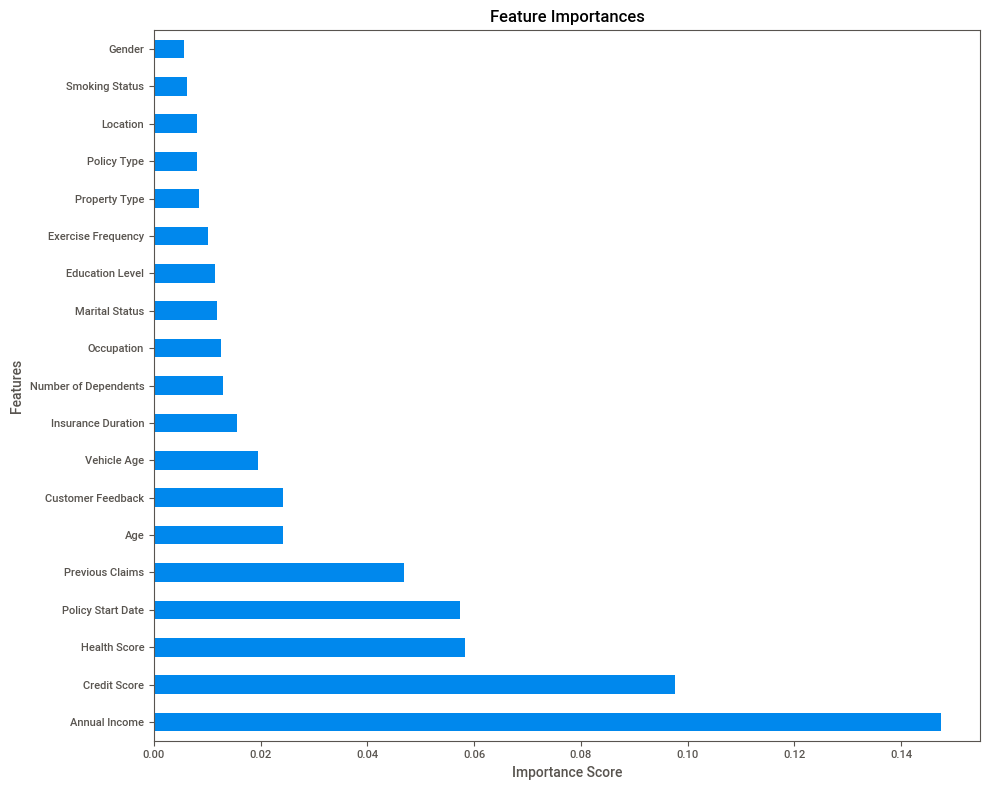

In [43]:
# Reset the index to make the features a column
feature_importances_reset = feature_importances.reset_index()
feature_importances_reset.columns = ['Feature', 'Importance', 'StdDev', 'P-Value', 'N', 'P99_High', 'P99_Low']

# Plot feature importances
feature_importances_reset.set_index('Feature')['Importance'].plot(kind='barh', figsize=(10, 8))
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [44]:
# Prepare Submission
submission = pd.read_csv(submission_template_path)
submission[TARGET] = predictions
submission.to_csv("submission.csv", index=False)

print("Submission file created: 'submission.csv'")

Submission file created: 'submission.csv'


# <div style="background-color:#0A0F29; font-family:'Poppins', bold; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">References</div>

- https://www.kaggle.com/code/stpeteishii/solution-to-a-plotly-graph-cannot-be-displayed